In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime
import matplotlib as mpl
import matplotlib.lines as mlines

In [9]:
df = pd.read_csv("twitter_data/stock_data.csv")
print(df.shape)
df.head()

(5791, 2)


,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("twitter_data/stock_data.csv")

# Display the shape of the dataframe
print("Shape of the dataframe:", df.shape)

# # Display the first few rows of the dataframe
# print("First few rows of the dataframe:")
# print(df.head())

# Display basic statistics
print("Basic statistics of the dataframe:")
print(df.describe())

# Check for missing values
print("Missing values in the dataframe:")
print(df.isnull().sum())

# Display the data types of each column
print("Data types of each column:")
print(df.dtypes)

# Distribution of 'positive' column

Shape of the dataframe: (5791, 2)
Basic statistics of the dataframe:
         Sentiment
count  5791.000000
mean      0.272664
std       0.962192
min      -1.000000
25%      -1.000000
50%       1.000000
75%       1.000000
max       1.000000
Missing values in the dataframe:
Text         0
Sentiment    0
dtype: int64
Data types of each column:
Text         object
Sentiment     int64
dtype: object


In [28]:
df['Sentiment'].value_counts()

Sentiment
 1    3685
-1    2106
Name: count, dtype: int64

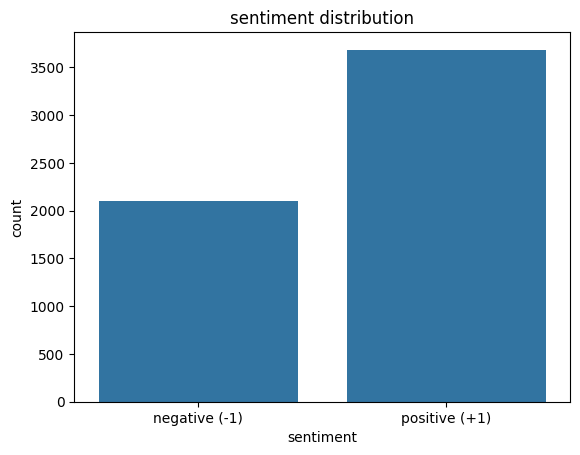

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#creating a count plot for sentiment distrubution

sns.countplot(x='Sentiment',data=df)
plt.title('sentiment distribution')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.xticks(ticks=[0,1],labels=['negative (-1)','positive (+1)'])
plt.show()

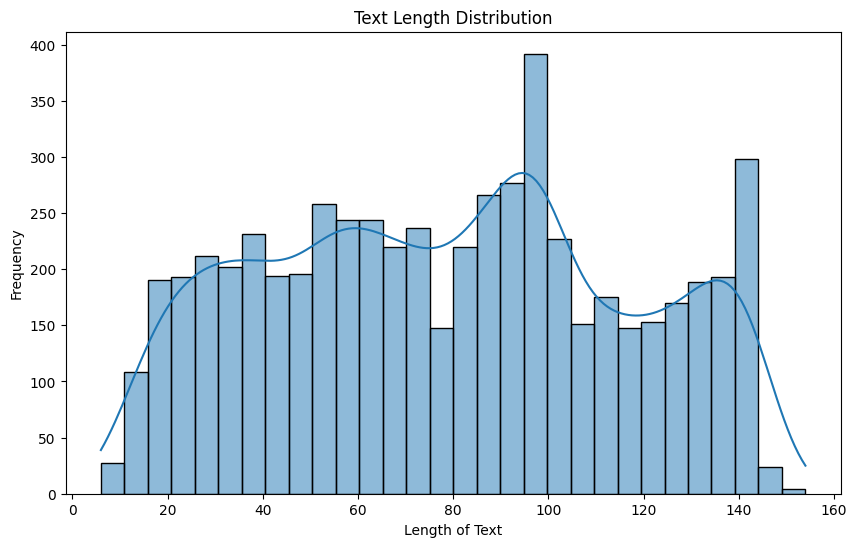

In [16]:
#  Analyze the length of the text

df['Text_Length'] = df['Text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['Text_Length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

C:\Users\mkahs\AppData\Local\Temp\ipykernel_19132\3216301093.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




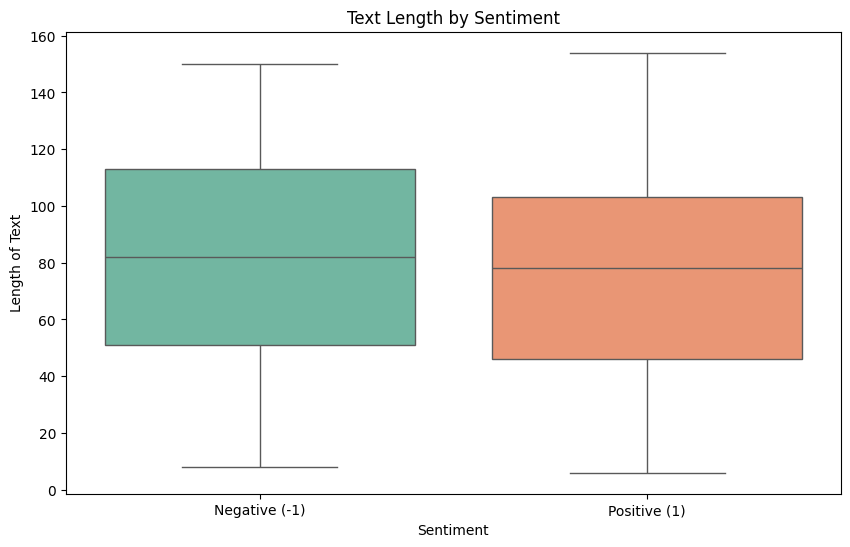

In [30]:
# Boxplot of text length by sentiment

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Text_Length', data=df, palette="Set2")
plt.title('Text Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length of Text')
plt.xticks(ticks=[0, 1], labels=['Negative (-1)',  'Positive (1)'])
plt.show()

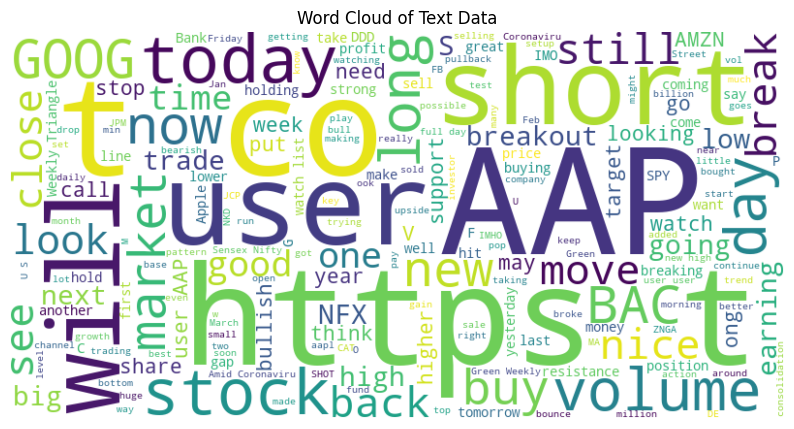

In [19]:
# Sample word cloud for visualizing common words

from wordcloud import WordCloud

# Combine all texts for the word cloud
all_text = ' '.join(df['Text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

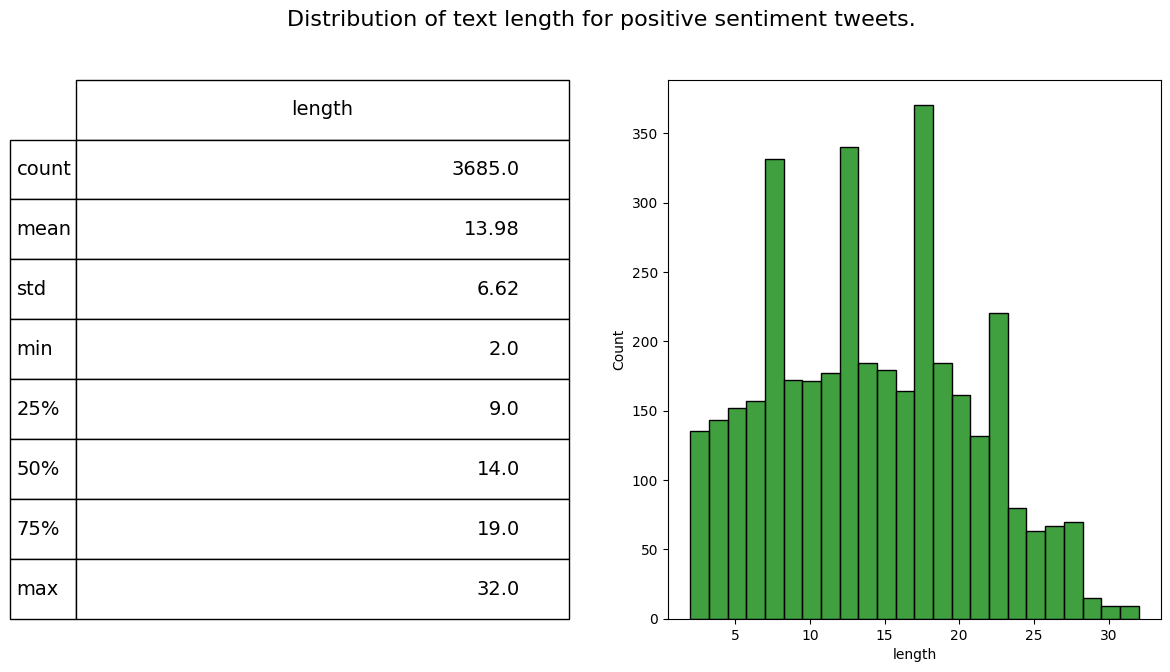

In [20]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Sentiment']==1]['length'], ax=ax1,color='green')
describe = df.length[df.Sentiment==1].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

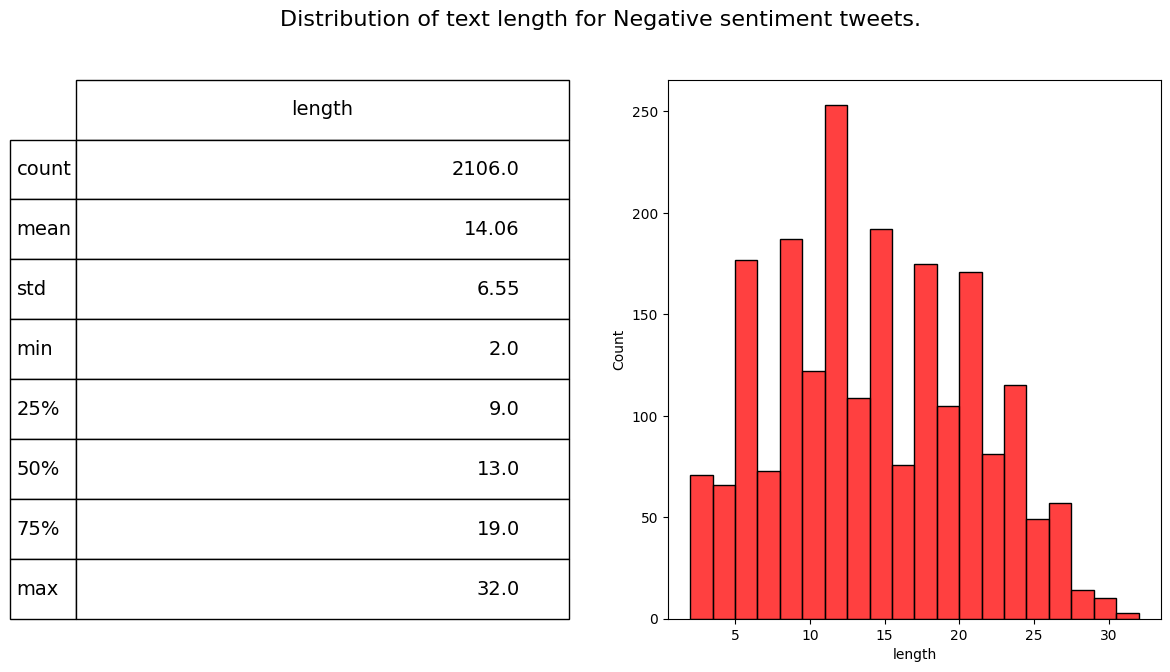

In [21]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.Text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Sentiment']==-1]['length'], ax=ax1,color='red')
describe = df.length[df.Sentiment==-1].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

plt.show()

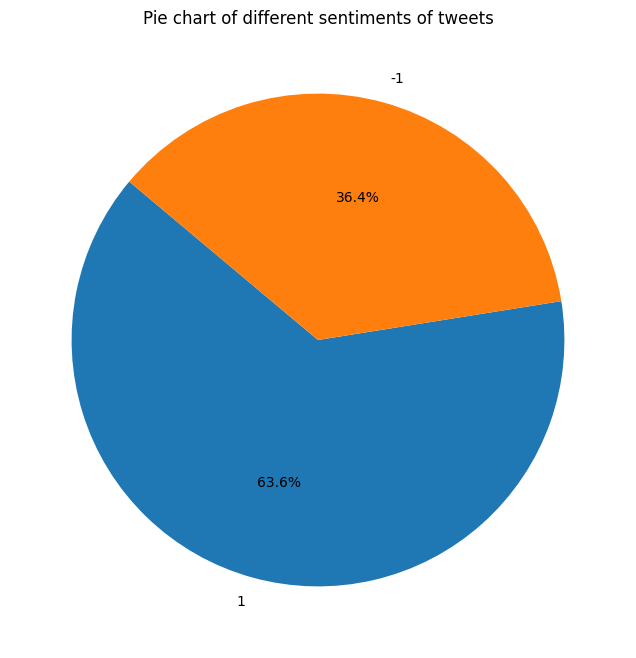

In [26]:
import matplotlib.pyplot as plt

# Assuming 'Sentiment' is a column in the dataframe
sentiment_counts = df['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie chart of different sentiments of tweets')
plt.show()